
**َQuestions**



Is there a relationship between playing at home and the number of goals scored?

How does possession affect match outcomes?

 What is the correlation between the number of corners and shots on target?

**Introduction**

In [ ]:
#Here I Will Import The Libraries That I Need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Here I Read The File And SHow The First Few Rows
df = pd.read_csv('/content/Match.csv')
df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,id,stage,match_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
count,1930.000000,1930.000000,1.930000e+03,1930.000000,1930.000000,1722.0,1722.000000,1722.000000,1722.000000,1722.000000,...,1693.000000,1704.000000,1689.000000,1702.000000,1703.000000,1708.000000,1700.000000,1688.000000,1702.000000,1697.000000
mean,965.500000,15.890155,1.056962e+06,1.586528,1.173575,1.0,2.067364,4.015099,6.052846,7.220093,...,103709.183107,96997.320423,105186.599171,119517.317274,97313.469172,96535.161593,118642.792941,125216.946682,111800.126322,129075.703005
std,557.287329,8.773420,5.226303e+05,1.281533,1.122569,0.0,0.490577,0.444220,0.501127,2.021038,...,118378.403125,109087.110621,103707.353062,103689.911540,120112.720868,107212.471930,124375.832990,119791.925114,115666.671671,121502.843626
min,1.000000,1.000000,4.890420e+05,0.000000,0.000000,1.0,1.000000,2.000000,2.000000,1.000000,...,3329.000000,3329.000000,3329.000000,4863.000000,5272.000000,2770.000000,2770.000000,2770.000000,3520.000000,5016.000000
25%,483.250000,9.000000,4.930892e+05,1.000000,0.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,37100.000000,36832.000000,37667.000000,38322.000000,33600.000000,36863.000000,37440.000000,38252.500000,35112.250000,37900.000000
50%,965.500000,16.000000,1.032698e+06,1.000000,1.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,38789.000000,38800.000000,46232.000000,94030.000000,38419.000000,38969.000000,46552.000000,78902.000000,45852.000000,78902.000000
75%,1447.750000,23.000000,1.677188e+06,2.000000,2.000000,1.0,2.000000,4.000000,6.000000,8.000000,...,149140.000000,149219.000000,157249.000000,172147.000000,118730.000000,131531.000000,173957.000000,178485.000000,167057.000000,181276.000000
max,1930.000000,34.000000,1.980072e+06,7.000000,7.000000,1.0,8.000000,8.000000,8.000000,9.000000,...,641042.000000,563215.000000,630950.000000,641042.000000,688876.000000,658786.000000,659493.000000,676625.000000,671331.000000,671331.000000


In [ ]:
#Here I Show The Columns Name
df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

**Data Wrangling**

In [ ]:
#Here I Show The Number Of Null Values And Where
print(df.isnull().sum())

id               0
country_id       0
league_id        0
season           0
stage            0
              ... 
foulcommit    1728
card          1728
cross         1729
corner        1729
possession    1729
Length: 85, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
#here i make a sub thing because if there is any non numeric values
df["home_team_goal"] = pd.to_numeric(df["home_team_goal"], errors="coerce")
df["away_team_goal"] = pd.to_numeric(df["away_team_goal"], errors="coerce")
df["goal"] = pd.to_numeric(df["goal"], errors="coerce")
df["shoton"] = pd.to_numeric(df["shoton"], errors="coerce")
df["possession"] = pd.to_numeric(df["possession"], errors="coerce")
df["foulcommit"] = pd.to_numeric(df["foulcommit"], errors="coerce")
df["card"] = pd.to_numeric(df["card"], errors="coerce")

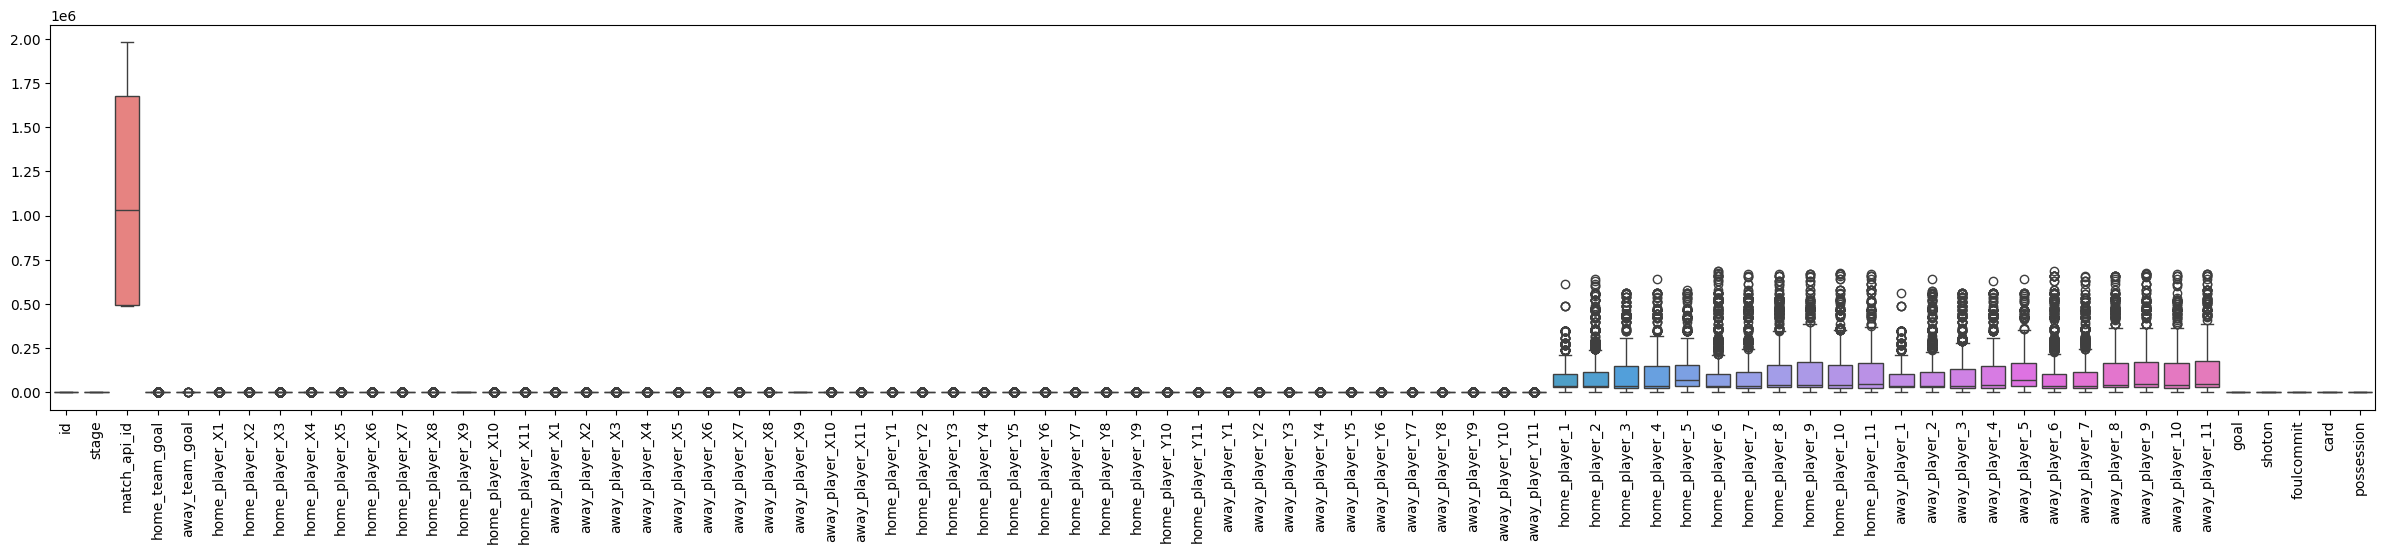

In [ ]:
plt.figure(figsize=(30, 5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


**Exploratory Data Analysis - EDA**

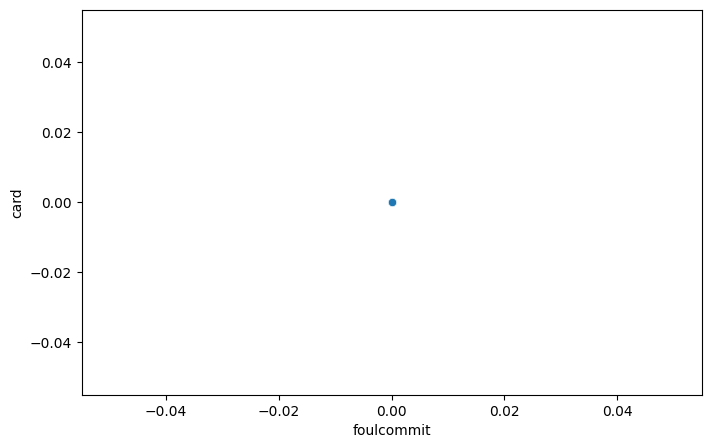

In [ ]:
#Here i make a diffrent type of visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x='foulcommit',y='card',data=df)
title=("foulcommit vs card")
plt.show()

#this plot show us that by increasing the fouls the cards increased

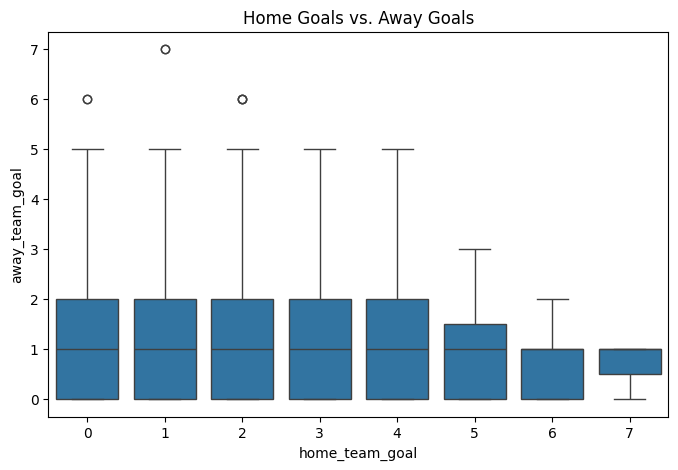

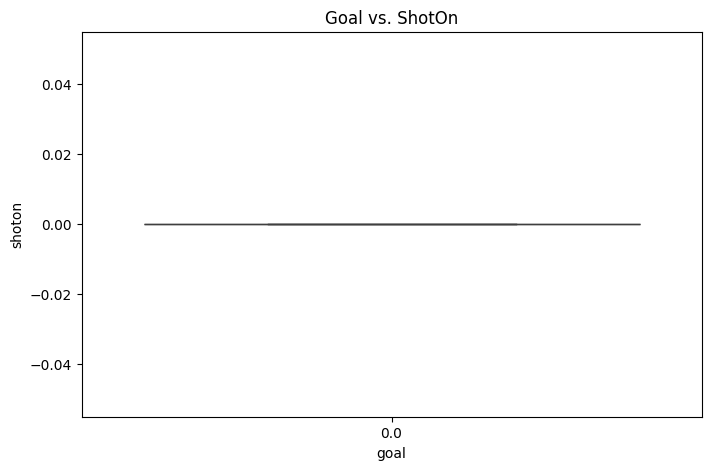

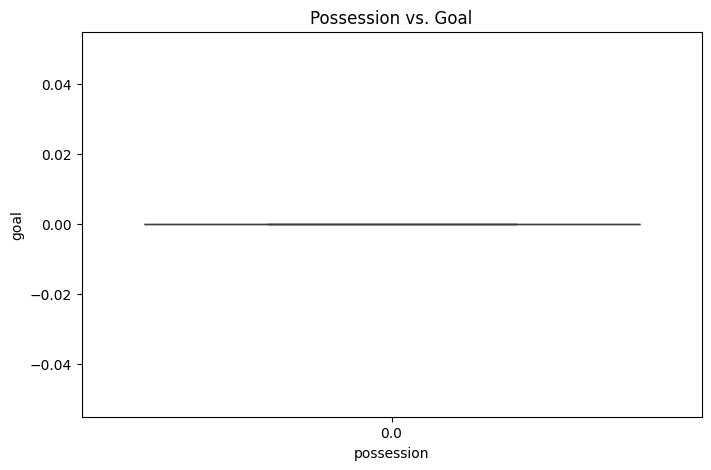

In [ ]:
# Here I Use The Def Function To Not Rebeating the code
def plot_boxplot(data, x_var, y_var, title):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x_var, y=y_var ,data=data)
    plt.title(title)
    plt.show()

plot_boxplot(df, "home_team_goal", "away_team_goal", "Home Goals vs. Away Goals")
plot_boxplot(df, "goal", "shoton", "Goal vs. ShotOn")
plot_boxplot(df, "possession", "goal", "Possession vs. Goal")

#"Goal vs. Shoton" this plot show us that by increasing the shoton value the goals increaded
#"Home Goals vs. Away Goals" this plot show us that the home goals is more than away goals
#"Possession vs. Goal" this plot show us that the more possesion make the team score more goals

**Conclusions Phase**

in this csv file i read  it and make head of it and i found i lot of NaN values so i thinked to use a fillns method to fill the NaN values then i visvalise data then i see what is data that has common things and will help me in future but first i  check all columns if numeric or not then i do a 1D histogram of all columns then i make 2D histogram to visualize some data i see it helpful i use the home team goals vs away team goals "Goal vs. Shoton" this plot show us that by increasing the shoton value the goals increaded"Home Goals vs. Away Goals" this plot show us that the home goals is more than away goals
"Possession vs. Goal" this plot show us that the more possesion make the team score more goals


**THE LIMITATIONS**

the limitaions i faced is :



*   the big size of this csv file
*   the many nan values that make my cant visualize my data

